<a href="https://colab.research.google.com/github/swathishaji/Internship1/blob/main/MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK**

Load MNIST dataset (Hand written digits dataset)


Train DNN and experiment with different number of layers and neurons.


Now train the DNN with only two class from the dataset (A binary classifier using DNN)


Apply Normalization to the image data and then train, and analyze the improvement.


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

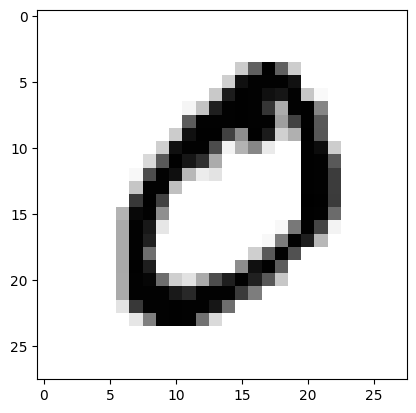

In [9]:
plt.imshow(X_train[1], cmap = 'binary')
plt.show()

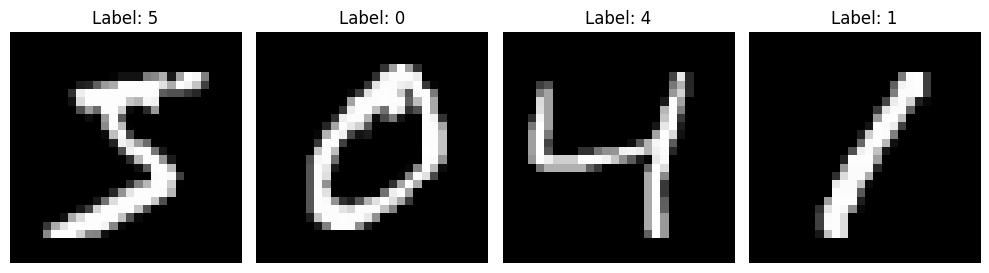

In [10]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
y_train[1]

np.uint8(0)

In [12]:
y_train[3]

np.uint8(1)

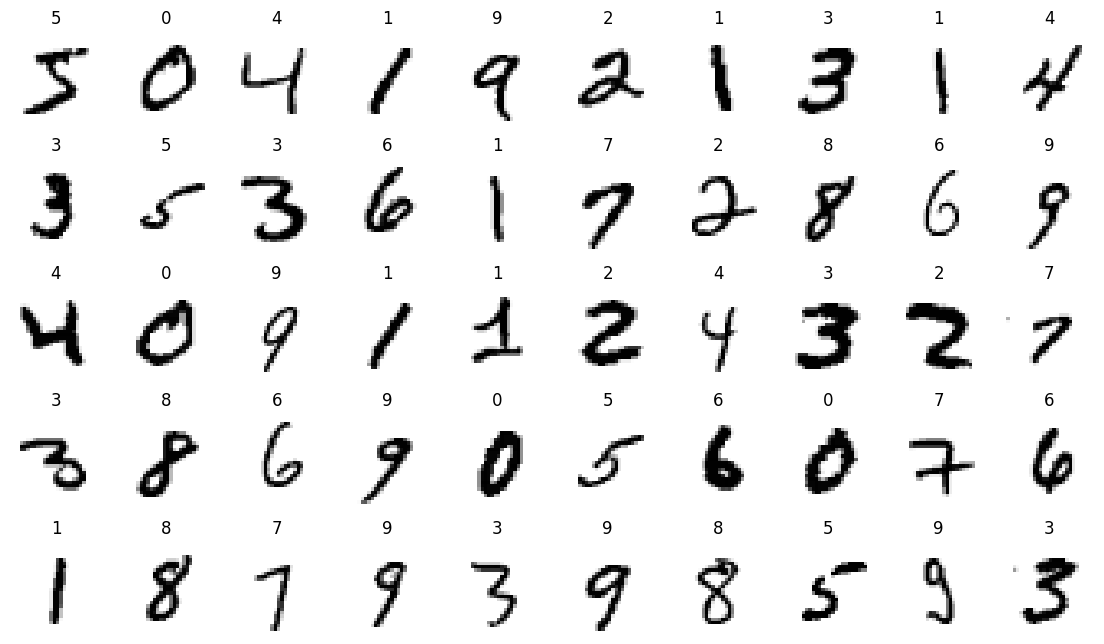

In [13]:
class_names = [0,1,2,3,4,5,6,7,8,9]

n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [14]:
DNN = keras.models.Sequential()
DNN.add(keras.layers.Flatten(input_shape = [28,28]))
DNN.add(keras.layers.Dense(600, activation = 'relu'))
DNN.add(keras.layers.Dense(300, activation = 'relu'))
DNN.add(keras.layers.Dense(100, activation = 'relu'))
DNN.add(keras.layers.Dense(10, activation = 'softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [20]:
history_DNN = DNN.fit(X_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8250 - loss: 2.6001 - val_accuracy: 0.9478 - val_loss: 0.1939
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9426 - loss: 0.2186 - val_accuracy: 0.9613 - val_loss: 0.1494
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9574 - loss: 0.1524 - val_accuracy: 0.9618 - val_loss: 0.1447
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9640 - loss: 0.1291 - val_accuracy: 0.9720 - val_loss: 0.1047
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9693 - loss: 0.1168 - val_accuracy: 0.9720 - val_loss: 0.1111
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9731 - loss: 0.0994 - val_accuracy: 0.9738 - val_loss: 0.0997
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9780 - loss: 0.0836 - val_accuracy: 0.9743 - val_loss: 0.1198
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9810 -

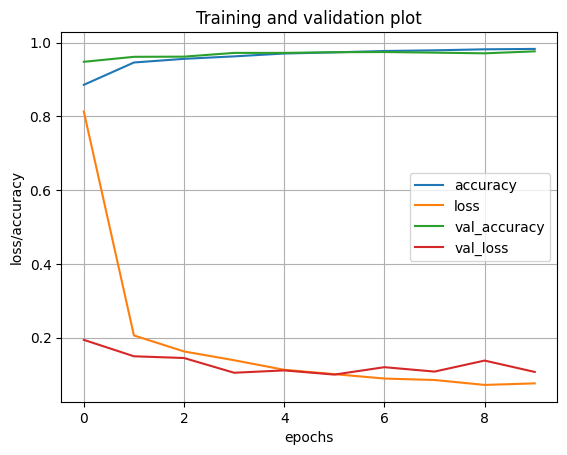

In [21]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [22]:
test_loss, test_accuracy = DNN.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9678 - loss: 0.2050
Test loss: 0.16983701288700104, Test accuracy: 0.9715999960899353


In [23]:
DNN2 = keras.models.Sequential()
DNN2.add(keras.layers.Flatten(input_shape = [28,28]))
DNN2.add(keras.layers.Dense(500, activation = 'relu'))
DNN2.add(keras.layers.Dense(400, activation = 'relu'))
DNN2.add(keras.layers.Dense(200, activation = 'relu'))
DNN2.add(keras.layers.Dense(100, activation = 'relu'))
DNN2.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
DNN2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [26]:
history_DNN2 = DNN2.fit(X_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8412 - loss: 2.2680 - val_accuracy: 0.9527 - val_loss: 0.1589
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9476 - loss: 0.1839 - val_accuracy: 0.9562 - val_loss: 0.1502
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9585 - loss: 0.1457 - val_accuracy: 0.9593 - val_loss: 0.1513
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9663 - loss: 0.1190 - val_accuracy: 0.9725 - val_loss: 0.1047
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9726 - loss: 0.1025 - val_accuracy: 0.9695 - val_loss: 0.1155
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9776 - loss: 0.0845 - val_accuracy: 0.9775 - val_loss: 0.1020
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9805 - loss: 0.0745 - val_accuracy: 0.9748 - val_loss: 0.1246
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9824 -

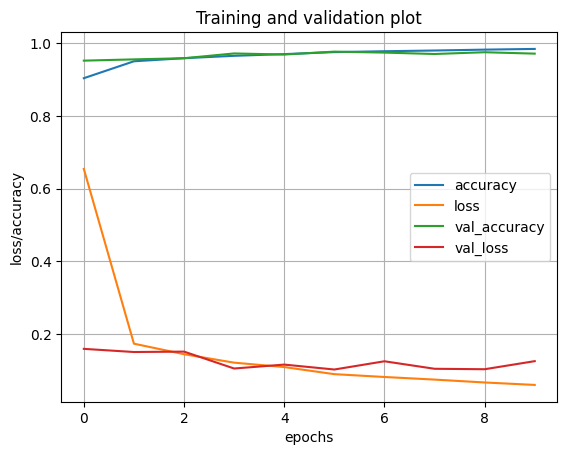

In [28]:
import pandas as pd
pd.DataFrame(history_DNN2.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [29]:
test_loss, test_accuracy = DNN2.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9669 - loss: 0.1464
Test loss: 0.13220886886119843, Test accuracy: 0.9696000218391418


Increase in accuracy

In [30]:
import numpy as np
train_filter = np.where((y_train == 4) | (y_train== 5))
x_train_binary = X_train[train_filter]
y_train_binary = y_train[train_filter]
y_train_binary[y_train_binary == 4] = 0
y_train_binary[y_train_binary == 5] = 1

In [31]:
x_train_binary.shape


(11263, 28, 28)

In [32]:
y_train_binary.shape


(11263,)

In [33]:
import numpy as np
test_filter = np.where((y_test == 4) | (y_test== 5))
x_test_binary = X_test[test_filter]
y_test_binary = y_test[test_filter]
y_test_binary[y_test_binary == 4] = 0
y_test_binary[y_test_binary == 5] = 1

In [34]:
x_test_binary.shape

(1874, 28, 28)

In [35]:
y_test_binary.shape


(1874,)

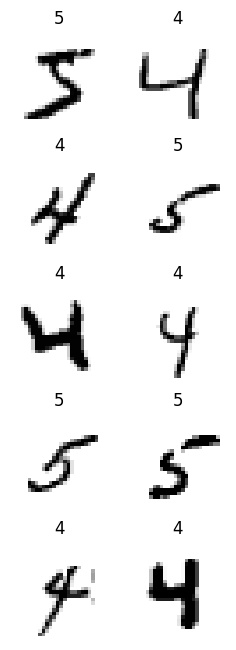

In [36]:
class_names = [4,5]

n_rows = 5
n_cols = 2
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train_binary[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train_binary[index]])

In [37]:
model_binary = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model_binary.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



In [39]:
history_binary = model_binary.fit(x_train_binary, y_train_binary, epochs=10, validation_split=0.1)


Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9560 - loss: 2.2155 - val_accuracy: 0.9920 - val_loss: 0.1868
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.2690 - val_accuracy: 0.9911 - val_loss: 0.1433
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0888 - val_accuracy: 0.9965 - val_loss: 0.0563
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9968 - loss: 0.0688 - val_accuracy: 0.9938 - val_loss: 0.3925
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0858 - val_accuracy: 0.9965 - val_loss: 0.2165
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0474 - val_accuracy: 0.9965 - val_loss: 0.1622
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0073 - val_accuracy: 0.9973 - val_loss: 0.1391
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 2.9670e-04 - val_accuracy

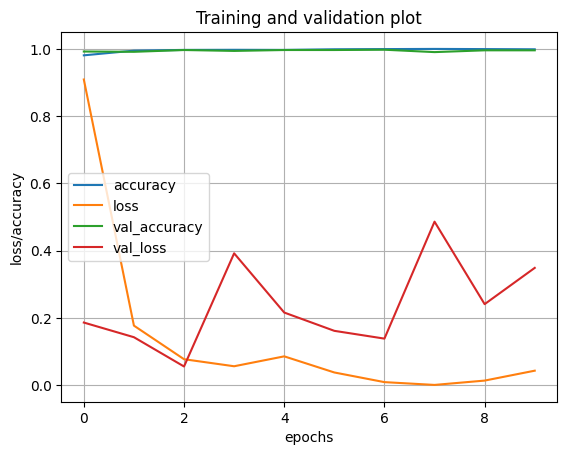

In [40]:
import pandas as pd
pd.DataFrame(history_binary.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [41]:
test_loss, test_accuracy = model_binary.evaluate(x_test_binary, y_test_binary)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.1673
Test loss: 0.13987739384174347, Test accuracy: 0.9967982769012451


STANDARDIZATION

In [42]:
X_mean = X_train.mean()
X_std = X_train.std()

In [43]:
X_train_std = X_train - X_mean/(X_std)
X_test_std = X_test - X_mean/(X_std)

In [44]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [45]:
hist_std_DNN = DNN.fit(X_train,y_train,epochs=10,validation_split=0.1,callbacks=[[tbCallBack]])


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9835 - loss: 0.0886 - val_accuracy: 0.9718 - val_loss: 0.1985
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9843 - loss: 0.0699 - val_accuracy: 0.9753 - val_loss: 0.1311
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9871 - loss: 0.0590 - val_accuracy: 0.9768 - val_loss: 0.1420
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9857 - loss: 0.0636 - val_accuracy: 0.9717 - val_loss: 0.2382
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9869 - loss: 0.0704 - val_accuracy: 0.9755 - val_loss: 0.1279
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9871 - loss: 0.0596 - val_accuracy: 0.9783 - val_loss: 0.1773
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9870 - loss: 0.0660 - val_accuracy: 0.9727 - val_loss: 0.1770
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9886 -

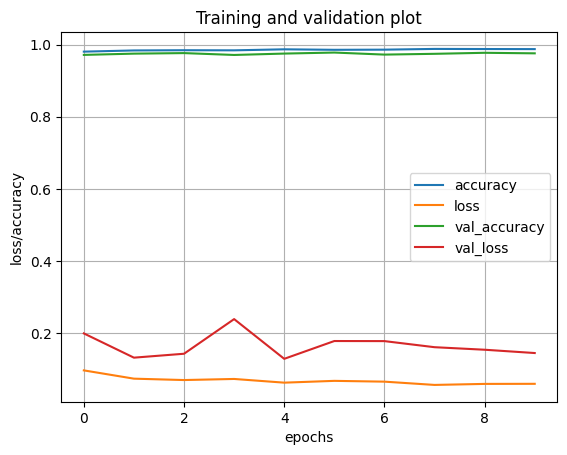

In [46]:
import pandas as pd
pd.DataFrame(hist_std_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()



In [47]:
test_loss, test_accuracy = DNN.evaluate(X_test_std, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9677 - loss: 0.2289
Test loss: 0.19925537705421448, Test accuracy: 0.9711999893188477


MINI-MAX NORMALIZATION

In [48]:
x_train_normalized = X_train / 255.0
x_test_normalized = X_test / 255.0


In [49]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
hist_nl_DNN = DNN.fit(x_train_normalized,y_train,epochs=10,validation_split=0.1,callbacks=[[tbCallBack]])



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9505 - loss: 0.1932 - val_accuracy: 0.9847 - val_loss: 0.0590
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9832 - val_loss: 0.0705
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9958 - loss: 0.0148 - val_accuracy: 0.9820 - val_loss: 0.0885
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9830 - val_loss: 0.0785
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9837 - val_loss: 0.0839
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9967 - loss: 0.0104 - val_accuracy: 0.9825 - val_loss: 0.1039
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9833 - val_loss: 0.0878
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9977 -

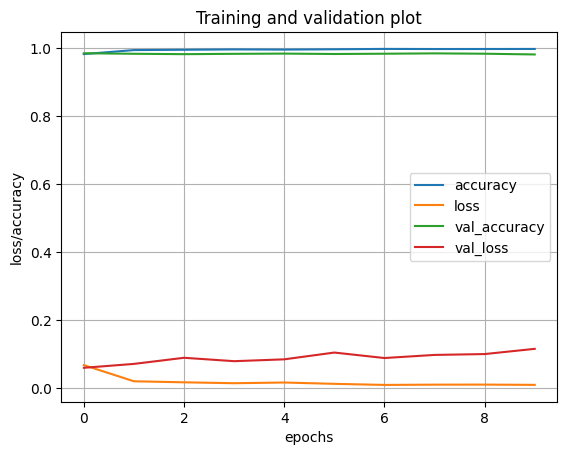

In [51]:
import pandas as pd
pd.DataFrame(hist_nl_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [52]:
test_loss, test_accuracy = DNN.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 49.5491
Test loss: 37.1070671081543, Test accuracy: 0.9781000018119812
